# Annan's work on Final Project

In [40]:
import pandas as pd
import geopandas as gpd
import numpy as np
from shapely.geometry import Point
%matplotlib inline

In [41]:
# Reading from csv:
## 1. Opening up the CSV with pandas
## 2. Take lat/lon and feed it to shapely, which creates a Point
## 3. original dataframe + geometry => geodataframe
## 4. tell the new geodataframe that coords are latitude and longitude

## First, do a quick process on the current dataset:

In [44]:
data2 = pd.read_csv('project_data2.csv')
data2.head()

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,Inspection_year,...,RECORD DATE,INSPECTION TYPE,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA
0,41598963,PADDY'S ON THE BAY,Bronx,50,PENNYFIELD AVENUE,10465.0,7184306651,American,02/03/2020,2020,...,11/23/2020,Cycle Inspection / Re-inspection,40.809911,-73.803584,210.0,13.0,11800.0,2079314.0,2055290425,BX52
1,40402089,HENRY ST. ALE HOUSE,Brooklyn,62,HENRY STREET,11201.0,7185224801,American,04/19/2018,2018,...,11/23/2020,Cycle Inspection / Initial Inspection,40.699108,-73.992221,302.0,33.0,100.0,3001647.0,3002210027,BK09
2,50073295,HAVANA EXPRESS,Bronx,815,HUTCHINSON RIVER PARKWAY,10465.0,7185181800,Mexican,02/06/2018,2018,...,11/23/2020,Pre-permit (Operational) / Initial Inspection,40.823678,-73.836420,210.0,13.0,9000.0,2080263.0,2055597501,BX09
3,41612554,DUNKIN',Bronx,3732,EAST TREMONT AVENUE,10465.0,3474787992,Café/Coffee/Tea,02/14/2018,2018,...,11/23/2020,Cycle Inspection / Initial Inspection,40.826475,-73.822010,210.0,13.0,15200.0,2079944.0,2055430156,BX52
4,50044005,HAPPY GARDEN,Brooklyn,7211,3 AVENUE,11209.0,7187481113,Chinese,02/14/2017,2017,...,11/23/2020,Cycle Inspection / Initial Inspection,40.633354,-74.027000,310.0,43.0,6600.0,3147329.0,3059080007,BK31


In [45]:
data3 = data2[data2.Latitude != 0]
data3 = data3[data3.Longitude != 0]

In [46]:
data3.head()

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,Inspection_year,...,RECORD DATE,INSPECTION TYPE,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA
0,41598963,PADDY'S ON THE BAY,Bronx,50,PENNYFIELD AVENUE,10465.0,7184306651,American,02/03/2020,2020,...,11/23/2020,Cycle Inspection / Re-inspection,40.809911,-73.803584,210.0,13.0,11800.0,2079314.0,2055290425,BX52
1,40402089,HENRY ST. ALE HOUSE,Brooklyn,62,HENRY STREET,11201.0,7185224801,American,04/19/2018,2018,...,11/23/2020,Cycle Inspection / Initial Inspection,40.699108,-73.992221,302.0,33.0,100.0,3001647.0,3002210027,BK09
2,50073295,HAVANA EXPRESS,Bronx,815,HUTCHINSON RIVER PARKWAY,10465.0,7185181800,Mexican,02/06/2018,2018,...,11/23/2020,Pre-permit (Operational) / Initial Inspection,40.823678,-73.836420,210.0,13.0,9000.0,2080263.0,2055597501,BX09
3,41612554,DUNKIN',Bronx,3732,EAST TREMONT AVENUE,10465.0,3474787992,Café/Coffee/Tea,02/14/2018,2018,...,11/23/2020,Cycle Inspection / Initial Inspection,40.826475,-73.822010,210.0,13.0,15200.0,2079944.0,2055430156,BX52
4,50044005,HAPPY GARDEN,Brooklyn,7211,3 AVENUE,11209.0,7187481113,Chinese,02/14/2017,2017,...,11/23/2020,Cycle Inspection / Initial Inspection,40.633354,-74.027000,310.0,43.0,6600.0,3147329.0,3059080007,BK31


## Let's take a look at Grade A and Grade B restaurant in 2019

### First, set the dataset ready

In [31]:
onlyGradeA = data3[data3.GRADE == 'A']
onlyGradeB = data3[data3.GRADE == 'B']
onlyGradeC = data3[data3.GRADE == 'C']
onlyGradeA2019 = onlyGradeA[onlyGradeA.Inspection_year == 2019]  ##56927 samples
onlyGradeB2019 = onlyGradeB[onlyGradeB.Inspection_year == 2019]  ##9973 samples
onlyGradeC2019 = onlyGradeC[onlyGradeC.Inspection_year == 2019]  ##4144 samples

### Calculate the variance first:
#### Grade A:

In [32]:
Longitude = []
Latitude = []
for i in range(56927):
    Longitude.append(onlyGradeA2019.iloc[i].Longitude)
    Latitude.append(onlyGradeA2019.iloc[i].Latitude)
# LongitudeNP = np.array(Longitude)
# LatitudeNP = np.array(Latitude)
print("Grade A Longitude Variance:", np.var(Longitude))
print("Grade A Latitude Variance:", np.var(Latitude))

Grade A Longitude Variance: 0.005707488867467359
Grade A Latitude Variance: 0.00443647054626574


#### Grade B:

In [33]:
Longitude = []
Latitude = []
for i in range(9973):
    Longitude.append(onlyGradeB2019.iloc[i].Longitude)
    Latitude.append(onlyGradeB2019.iloc[i].Latitude)
# LongitudeNP = np.array(Longitude)
# LatitudeNP = np.array(Latitude)
print("Grade B Longitude Variance:", np.var(Longitude))
print("Grade B Latitude Variance:", np.var(Latitude))

Grade B Longitude Variance: 0.004924502183572348
Grade B Latitude Variance: 0.004876779883594899


In [34]:
print((0.004876779883594899 - 0.004802446978271626) / 0.004876779883594899)

0.01524221045393556


#### Grade C:

In [35]:
Longitude = []
Latitude = []
for i in range(4144):
    Longitude.append(onlyGradeC2019.iloc[i].Longitude)
    Latitude.append(onlyGradeC2019.iloc[i].Latitude)
# LongitudeNP = np.array(Longitude)
# LatitudeNP = np.array(Latitude)
print("Grade C Longitude Variance:", np.var(Longitude))
print("Grade C Latitude Variance:", np.var(Latitude))

Grade C Longitude Variance: 0.004813638314514972
Grade C Latitude Variance: 0.004802446978271626


### take a look at first 2000 dataset:

In [36]:
X = []
y = []
for i in range(1000):
    X.append([onlyGradeA2019.iloc[i].Longitude, onlyGradeA2019.iloc[i].Latitude])
    y.append(1)
for i in range(1000,2000):
    X.append([onlyGradeB2019.iloc[i - 1000].Longitude, onlyGradeB2019.iloc[i - 1000].Latitude])
    y.append(-1)
# print(X[0])

### plot the graph

Text(0.5, 1.0, '2019 Restaurant Grade A(red) and Grade B(green) with 2000 dataset')

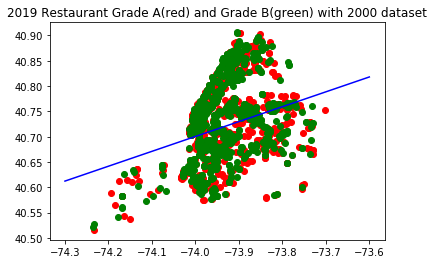

In [37]:
from sklearn import svm
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

model = svm.SVC(kernel='linear', C=0.1)
model.fit(X, y)
W = model.coef_[0]
I = model.intercept_
a = -W[0]/W[1]
b = I[0]/W[1]

for i in range(1000):
    plt.plot(X[i][0], X[i][1], marker='o', ls='None', c='r')
for i in range(1000,2000):
    plt.plot(X[i][0], X[i][1], marker='o', ls='None', c='g')
x = np.linspace(-74.3, -73.6, 10000)
plt.plot(x, a*x - b, c = 'b')
plt.title('2019 Restaurant Grade A(red) and Grade B(green) with 2000 dataset')

### However, when the dataset increases... (3 times)

In [38]:
X = []
y = []
for i in range(3000):
    X.append([onlyGradeA2019.iloc[i].Longitude, onlyGradeA2019.iloc[i].Latitude])
    y.append(1)
for i in range(3000,6000):
    X.append([onlyGradeB2019.iloc[i - 3000].Longitude, onlyGradeB2019.iloc[i - 3000].Latitude])
    y.append(-1)

Text(0.5, 1.0, '2019 Restaurant Grade A(red) and Grade B(green) with 6000 dataset')

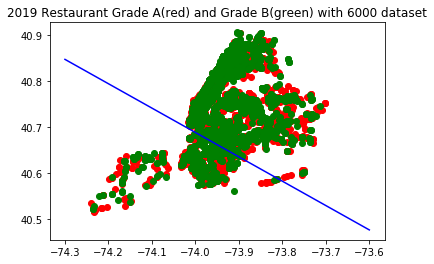

In [39]:
from sklearn import svm
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

model = svm.SVC(kernel='linear', C=0.1)
model.fit(X, y)
W = model.coef_[0]
I = model.intercept_
a = -W[0]/W[1]
b = I[0]/W[1]

for i in range(3000):
    plt.plot(X[i][0], X[i][1], marker='o', ls='None', c='r')
for i in range(3000,6000):
    plt.plot(X[i][0], X[i][1], marker='o', ls='None', c='g')
x = np.linspace(-74.3, -73.6, 10000)
plt.plot(x, a*x - b, c = 'b')
plt.title('2019 Restaurant Grade A(red) and Grade B(green) with 6000 dataset')

### use K-NN:

In [118]:
import math
def euclidean_distance(x1, x2):
  distance = 0;
  for i in range(len(x1)):
    distance += (x1[i] - x2[i])**2
  return math.sqrt(distance)

def get_neighbors( X_train, y_train, x_test, k, dist_func = euclidean_distance): 
    distance = []
    for i in range(len(X_train)):
        distance.append((X_train[i], y_train[i], dist_func(X_train[i], x_test)))
    distance.sort(key=lambda tup:tup[2])
    distance = np.array(distance)
    return distance[:k]

In [119]:
from scipy import stats
def make_prediction(X_train, y_train, X_test, k, dist_func = euclidean_distance):
    prediction = []
    for x_test in X_test:
        res = get_neighbors(X_train, y_train, x_test, k, dist_func)
        neighbor_classes = res[:,1]
        # print(neighbor_classes)
        mode_res = stats.mode(neighbor_classes)
        #print(neighbor_classes, mode_res.mode, mode_res.count)
        prediction.append(mode_res.mode)
    prediction = np.array(prediction)
    return prediction.flatten()

In [120]:
def getErrorCountAndAccuracy(prediction, y_test, X_test):
    total = len(y_test)
    error_Count = 0
    error_examples_pos = []
    error_example = []
    for i in range(total):
        if prediction[i]!=y_test[i]:
            error_Count +=1
            error_examples_pos.append(i)
    accuracy = 1 - error_Count/total
    for pos in error_examples_pos:
        error_example.append(X_test[pos])
    # print(f"False prediction examples: {error_example}, at Pos: {error_examples_pos} False count = {error_Count}, Accuracy = {accuracy}")
    return (error_example,error_examples_pos, error_Count, accuracy)

In [123]:
X = []
y = []
for i in range(1000):
    X.append([onlyGradeA2019.iloc[i].Longitude, onlyGradeA2019.iloc[i].Latitude])
    y.append(1)
for i in range(1000,2000):
    X.append([onlyGradeB2019.iloc[i - 1000].Longitude, onlyGradeB2019.iloc[i - 1000].Latitude])
    y.append(-1)
X_train = np.array(X)
y_train = np.array(y)

X = []
y = []
for i in range(1000):
    X.append([onlyGradeA2019.iloc[i + 1000].Longitude, onlyGradeA2019.iloc[i + 1000].Latitude])
    y.append(1)
for i in range(1000,2000):
    X.append([onlyGradeA2019.iloc[i + 1000].Longitude, onlyGradeA2019.iloc[i + 1000].Latitude])
    y.append(-1)
X_test = np.array(X)
y_test = np.array(y)

    
k = 1
prediction = make_prediction(X_train,y_train,X_test, k)
print(f"k = {k}")
error_example,error_examples_pos, error_Count, accuracy = getErrorCountAndAccuracy(prediction, y_test, X_test)
print(f"False count = {error_Count}, Accuracy = {accuracy}")

k = 1
False count = 1010, Accuracy = 0.495


### Using K means Clustering

In [124]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np

In [92]:
from sklearn.datasets.samples_generator import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)
# plt.scatter(X[:, 0], X[:, 1], s=50);
# print(X)

In [93]:
X = []
y = []
for i in range(10000):
    X.append([onlyGradeA2019.iloc[i].Longitude, onlyGradeA2019.iloc[i].Latitude])
    y.append(1)
# for i in range(100,200):
#     X.append([onlyGradeB2019.iloc[i - 1000].Longitude, onlyGradeB2019.iloc[i - 1000].Latitude])
#     y.append(-1)
npX = np.array(X)
npy = np.array(y)
# plt.scatter(npX[:, 0], npX[:, 1], s=50);
# print(npX)

In [94]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=7)
kmeans.fit(npX)
y_kmeans = kmeans.predict(npX)

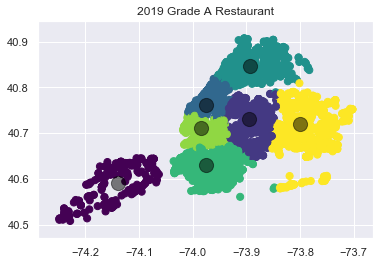

In [95]:
plt.scatter(npX[:, 0], npX[:, 1], c=y_kmeans, s=50, cmap='viridis')
plt.title('2019 Grade A Restaurant')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

In [87]:
X = []
y = []
for i in range(9000):
    X.append([onlyGradeB2019.iloc[i].Longitude, onlyGradeB2019.iloc[i].Latitude])
    y.append(1)
# for i in range(100,200):
#     X.append([onlyGradeB2019.iloc[i - 1000].Longitude, onlyGradeB2019.iloc[i - 1000].Latitude])
#     y.append(-1)
npX = np.array(X)
npy = np.array(y)
# plt.scatter(npX[:, 0], npX[:, 1], s=50);
# print(npX)

In [88]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=7)
kmeans.fit(npX)
y_kmeans = kmeans.predict(npX)

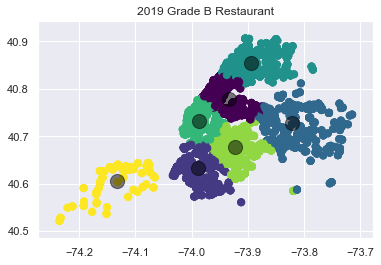

In [90]:
plt.scatter(npX[:, 0], npX[:, 1], c=y_kmeans, s=50, cmap='viridis')
plt.title('2019 Grade B Restaurant')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

In [129]:
X = []
y = []
for i in range(4000):
    X.append([onlyGradeC2019.iloc[i].Longitude, onlyGradeC2019.iloc[i].Latitude])
    y.append(1)
npX = np.array(X)
npy = np.array(y)
# plt.scatter(npX[:, 0], npX[:, 1], s=50);
# print(npX)

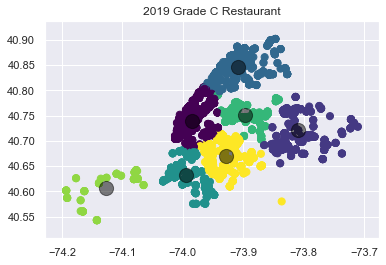

In [131]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=7)
kmeans.fit(npX)
y_kmeans = kmeans.predict(npX)
plt.scatter(npX[:, 0], npX[:, 1], c=y_kmeans, s=50, cmap='viridis')
plt.title('2019 Grade C Restaurant')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

### Clustering with 20 cluster nodes

In [136]:
X = []
y = []
for i in range(9000):
    X.append([onlyGradeB2019.iloc[i].Longitude, onlyGradeB2019.iloc[i].Latitude])
    y.append(1)
npX = np.array(X)
npy = np.array(y)
# plt.scatter(npX[:, 0], npX[:, 1], s=50);
# print(npX)

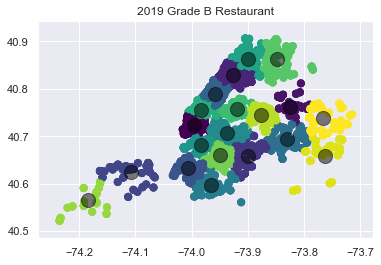

In [138]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=20)
kmeans.fit(npX)
y_kmeans = kmeans.predict(npX)
plt.scatter(npX[:, 0], npX[:, 1], c=y_kmeans, s=50, cmap='viridis')
plt.title('2019 Grade B Restaurant')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);